# Time Series Analysis: Predicting Stock Prices


# Start of Linear Regression Build for evaluating Apple Stock

# import necessary libraries 


In [16]:

import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


# Acquire the data

In [17]:
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

[*********************100%%**********************]  1 of 1 completed


# Ensure proper DatetimeIndex with frequency for time series analysis


In [18]:
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

In [19]:
print('-------Raw Data-------')
print(stock_data.head())

-------Raw Data-------
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.724564   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.443573   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.723587   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.840271   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.008102   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


# Calculate rolling averages


In [20]:
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

In [21]:
print('-------Engineered Data-------')
print(stock_data.describe())

-------Engineered Data-------
             Open        High         Low       Close   Adj Close  \
count  520.000000  520.000000  520.000000  520.000000  520.000000   
mean   163.438962  165.284558  161.752211  163.604731  162.527787   
std     17.955377   17.635141   18.151914   17.869666   18.053758   
min    126.010002  127.769997  124.169998  125.019997  124.166641   
25%    148.790001  150.810001  147.150002  149.322506  148.110767   
50%    164.540001  166.325005  162.875000  164.970001  163.492447   
75%    176.479996  178.000004  174.820007  176.285000  175.658539   
max    198.020004  199.619995  197.000000  198.110001  197.857529   

             Volume   7_day_avg  30_day_avg  
count  5.200000e+02  520.000000  520.000000  
mean   7.337175e+07  163.526572  163.074712  
std    2.535230e+07   17.524662   16.172172  
min    2.404830e+07  127.422855  132.859332  
25%    5.413660e+07  148.475359  147.693916  
50%    6.913640e+07  164.478574  164.548501  
75%    8.664598e+07  176.2

# Split the data into training and test sets


In [22]:
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data for Linear Regression


In [23]:
X_train = train[['7_day_avg', '30_day_avg']]
y_train = train['Close']
X_test = test[['7_day_avg', '30_day_avg']]

# Visualization of Train and Test Datasets


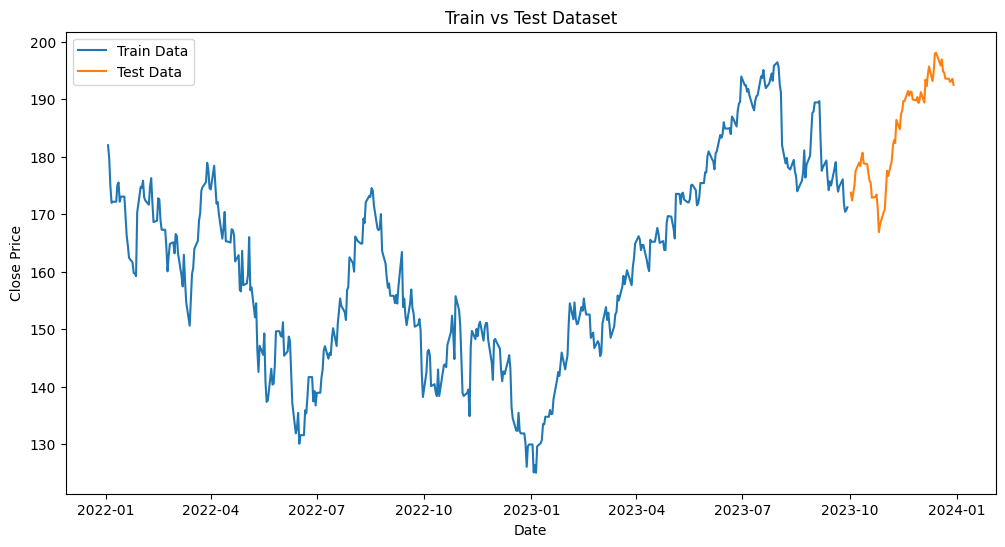

In [24]:
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Implement linear regression using the rolling averages as features.

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
y_test = test['Close']

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Linear Regression

In [26]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')      
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 2.47
Mean Squared Error (MSE): 9.22
Root Mean Squared Error (RMSE): 3.04


# Plot creation

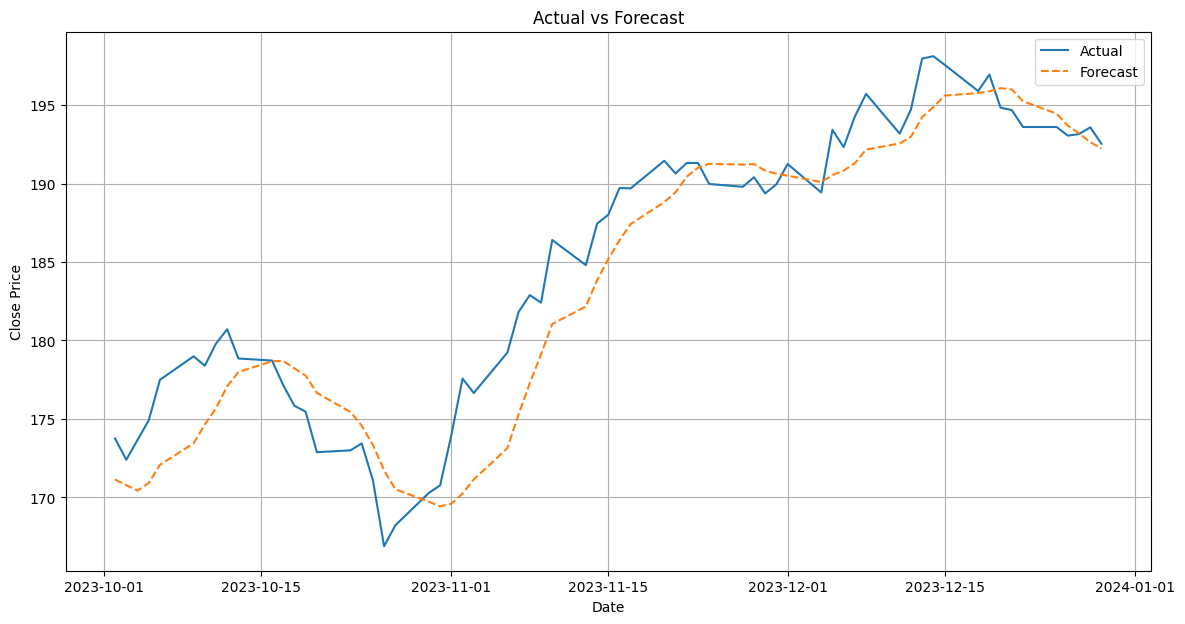

In [27]:
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Commentary on the performance of each model based on these metrics

## Mean Absolute Error (MAE): 2.47

- This is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting). A MAE of 2.47 means that on average, your predictions are about 2.47 units away from the actual values.

## Mean Squared Error (MSE): 9.72

- This is the average of the squares of the differences between the predicted and actual values. Squaring the differences amplifies the impact of large differences. An MSE of 9.22 means that the square of the differences between your predictions and the actual values is, on average, about 9.22.

## Root Mean Squared Error (RMSE): 3.04

- This is the square root of the MSE. Taking the square root of the MSE converts the units back to the original units of the output variable, which can be useful for interpretation and understanding. An RMSE of 3.04 means that the square root of the average squared differences between your predictions and the actual values is about 3.04.

# Forecasted values against actual values in the test set with a plot

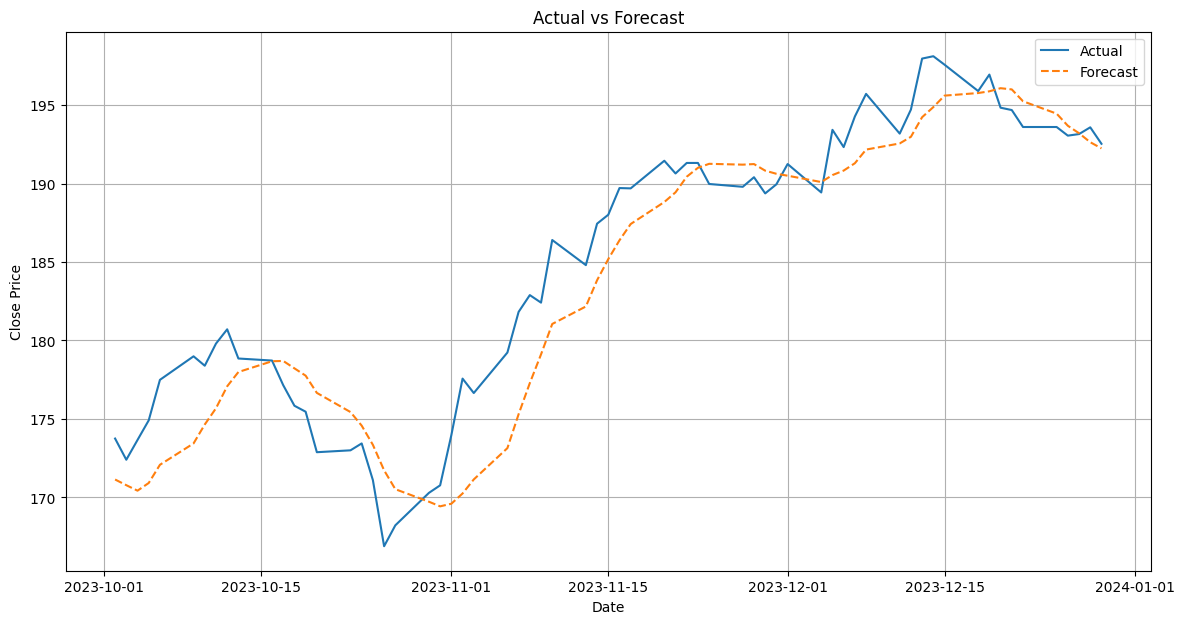

- As can be seen in the graph above, the differences between the forecasted and actual values can be quite extreme at times. While to the unexperienced observed they may believe these values to be impressive, it is imperitaive to note, as explored below, that this sort of result would generate horrendous returns for investors, causing us to undervalue and overvalue AAPL stock at multiple different opportune moments. 

# Implications of model performance for real-world decision-making in finance 

- The performance of the linear regression model, as indicated by the Mean Absolute Error (MAE) of 2.47, Mean Squared Error (MSE) of 9.22, and Root Mean Squared Error (RMSE) of 3.04, holds substantial implications for practical financial decision-making, specifically concerning Apple stock. Precise predictions of Apple's stock price are vital for various financial activities such as asset valuation, risk mitigation strategies, trading decisions, and hedging operations. If the model's predictions are inaccurate, it could lead to assets being valued incorrectly, risk strategies failing to provide adequate protection, trading decisions that are not optimal, and hedging operations that do not effectively offset risk. Given these MAE, MSE, and RMSE values, it's clear that while the model provides some predictive capability, it's not entirely accurate. Even minor inaccuracies can lead to significant financial consequences due to Apple's large market capitalization and the high volume of trading activity it typically sees. These metrics provide a summary of the model's performance but do not capture all aspects of its predictive accuracy. Therefore, while the linear regression model can be a valuable tool for forecasting Apple's stock price, it should be used judiciously. It's crucial to employ additional methods to evaluate its performance, such as backtesting on historical data, and to integrate its predictions with other information and models when making trading decisions. In conclusion, while the model's performance metrics suggest it has some predictive power, it's important to remember that no model is perfect. Therefore, any decisions based on its predictions should be made with caution and supplemented with other forms of analysis and expert judgment.


# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).


# Start of Linear Regression Build for evaluating Apple Stock

# Import Necessary Libraries

In [28]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Acquire the data

In [29]:
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

stock_data_actual = yf.download('AAPL', start = '2024-01-02', end = '2024-01-05')

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed


# Ensure proper DatetimeIndex with frequency for time series analysis


In [30]:
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

In [31]:
print('-------Raw Data-------')
print(stock_data.head())

-------Raw Data-------
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  177.830002  182.880005  177.710007  182.009995  179.724564   
2022-01-04  182.630005  182.940002  179.119995  179.699997  177.443573   
2022-01-05  179.610001  180.169998  174.639999  174.919998  172.723587   
2022-01-06  172.699997  175.300003  171.639999  172.000000  169.840271   
2022-01-07  172.889999  174.139999  171.029999  172.169998  170.008102   

               Volume  
Date                   
2022-01-03  104487900  
2022-01-04   99310400  
2022-01-05   94537600  
2022-01-06   96904000  
2022-01-07   86709100  


# Apply Exponential Smoothing with trend and seasonality


In [32]:

model = ExponentialSmoothing(stock_data['Close'], trend='add', seasonal='add', seasonal_periods=12).fit()


# Forecast the next 3 periods


In [33]:
forecast = model.forecast(3)

# Plot the original data and the forecast


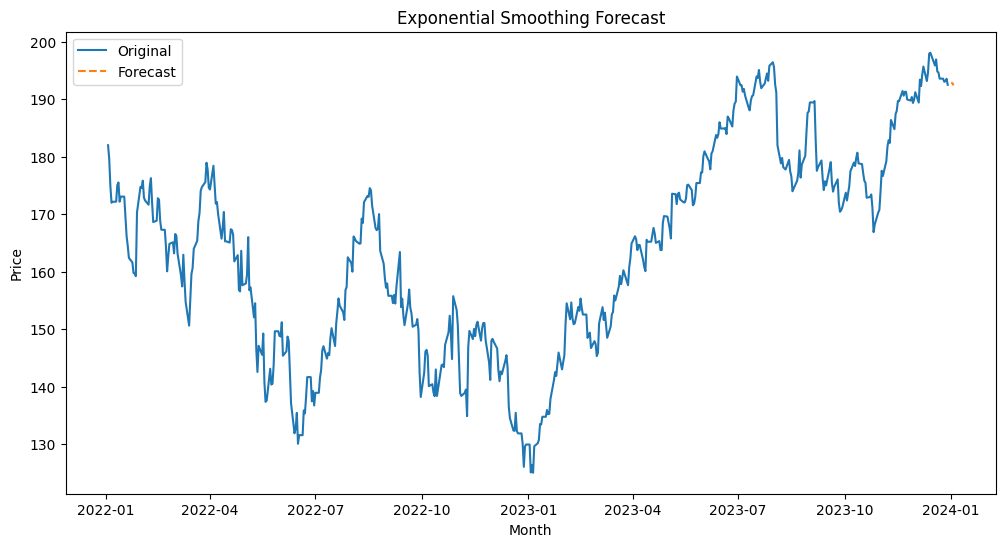

In [34]:
plt.figure(figsize=(12, 6))
plt.plot(stock_data['Close'], label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Price')
plt.legend()
plt.show()

# Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the Exponential Smoothing

In [35]:
mae = mean_absolute_error(stock_data_actual['Close'], forecast)
mse = mean_squared_error(stock_data_actual['Close'], forecast)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')      
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Mean Absolute Error (MAE): 8.78
Mean Squared Error (MSE): 78.97
Root Mean Squared Error (RMSE): 8.89


# Plot Creation

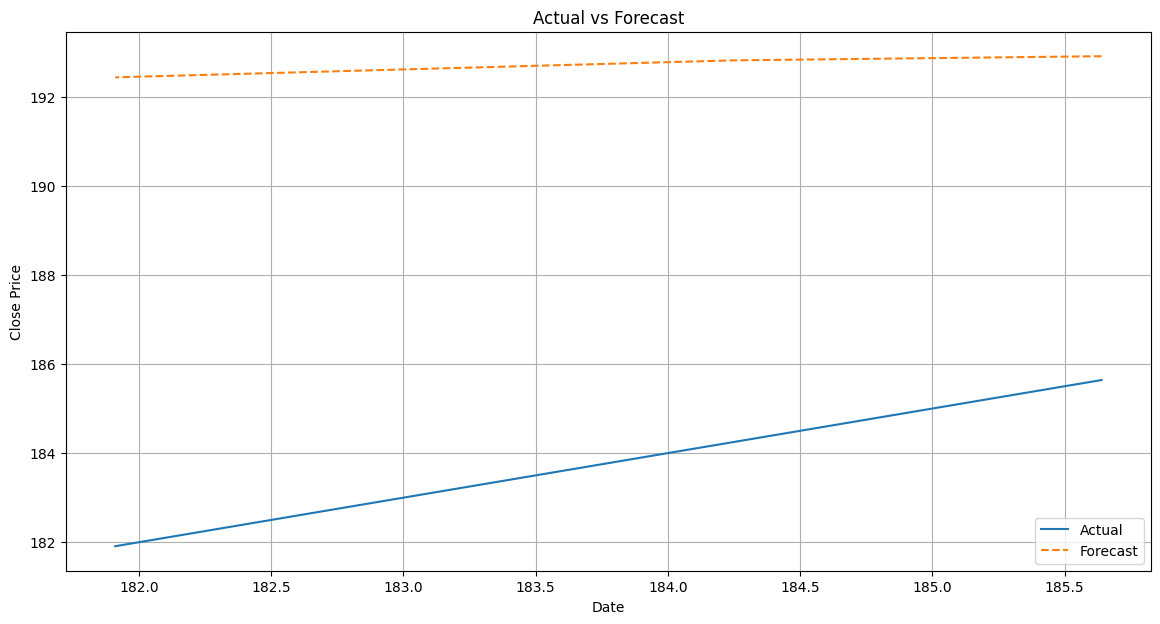

In [36]:
plt.figure(figsize=(14, 7))
plt.plot(stock_data_actual['Close'], stock_data_actual['Close'], label='Actual')
plt.plot(stock_data_actual['Close'], forecast, label='Forecast', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Forecast')
plt.legend()
plt.grid(True)
plt.show()

# Commentary on the performance of Exponential Smoothing based on these metrics


## Mean Absolute Error (MAE): 8.78

- This is the average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions were. The measure gives an idea of the magnitude of the error, but no idea of the direction (e.g. over or under predicting). A MAE of 8.78 means that on average, your predictions are about 8.78 units away from the actual values.

## Mean Squared Error (MSE): 
- This is the average of the squares of the differences between the predicted and actual values. Squaring the differences amplifies the impact of large differences. An MSE of 78.97 means that the square of the differences between your predictions and the actual values is, on average, about 78.97.

## Root Mean Squared Error (RMSE): 8.89
- This is the square root of the MSE. Taking the square root of the MSE converts the units back to the original units of the output variable, which can be useful for interpretation and understanding. An RMSE of 8.89 means that the square root of the average squared differences between your predictions and the actual values is about 8.89.

## Forecasted values against actual values in the test set with a plot 

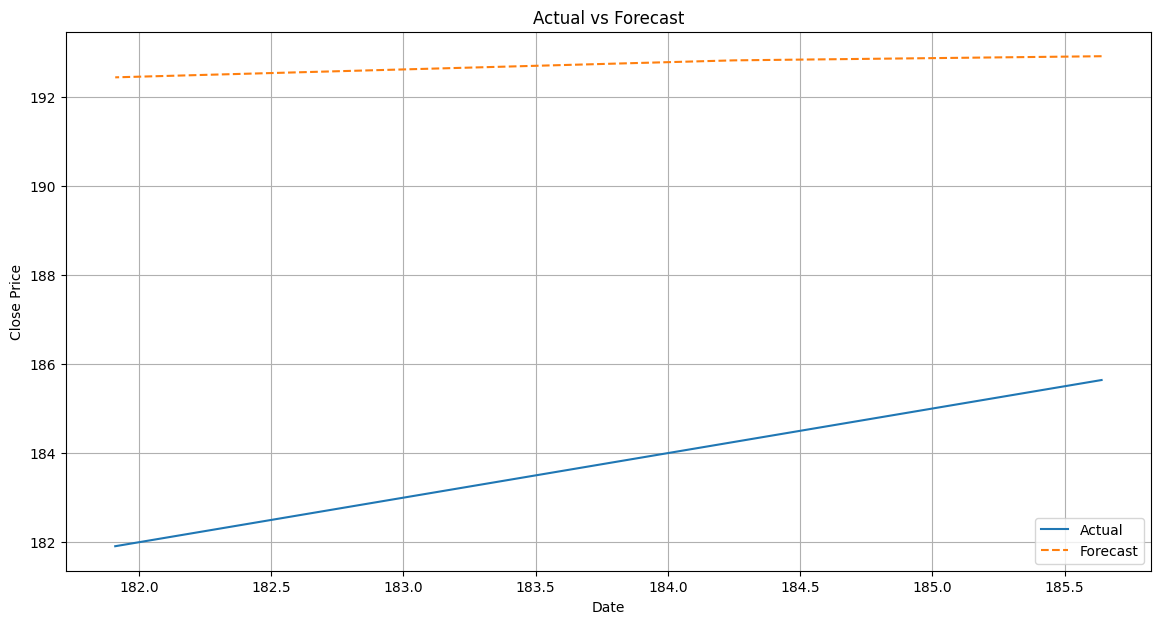

- As can be seen in the graph above, the differences between the forecasted and actual values are quite extreme. This is greatly impactful when evaluating a buy for AAPL stock contracts, and could result in huge losses for the purchaser. 

# Implications of model performance for real-world decision-making in finance 

- The performance of the exponential smoothing model, as indicated by the Mean Absolute Error (MAE) of 8.78, Mean Squared Error (MSE) of 78.97, and Root Mean Squared Error (RMSE) of 8.89, has significant implications for real-world decision-making in finance, particularly in the context of Apple stock. Accurate forecasting of Apple's stock price is crucial for a variety of financial activities such as asset valuation, risk mitigation strategies, trading decisions, and hedging operations. If the model's predictions are inaccurate, it could lead to assets being valued incorrectly, risk strategies failing to provide adequate protection, trading decisions that are not optimal, and hedging operations that do not effectively offset risk. Given these MAE, MSE, and RMSE values, it's clear that while the model provides some predictive capability, it's not entirely accurate. Even minor inaccuracies can lead to significant financial consequences due to Apple's large market capitalization and the high volume of trading activity it typically sees. These metrics provide a summary of the model's performance but do not capture all aspects of its predictive accuracy. Therefore, while the exponential smoothing model can be a valuable tool for forecasting Apple's stock price, it should be used judiciously. It's crucial to employ additional methods to evaluate its performance, such as backtesting on historical data, and to integrate its predictions with other information and models when making trading decisions. In conclusion, while the model's performance metrics suggest it has some predictive power, it's important to remember that no model is perfect. Therefore, any decisions based on its predictions should be made with caution and supplemented with other forms of analysis and expert judgment.


# Import the proper libraries 

In [46]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
from tensorflow.keras.optimizers import Adam


# Data Scaling


In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1,1))


# Choosing 60 days for time steps

In [48]:
x = []
y = []
for i in range(60, len(scaled_data)):
    x.append(scaled_data[i-60:i, 0])
    y.append(scaled_data[i, 0])



x, y = np.array(x), np.array(y)
x = np.reshape(x, (x.shape[0], x.shape[1], 1))

# Splitting the data


In [49]:
split = round(0.8 * len(x))  # 80% data for training
x_train = x[:split]
y_train = y[:split]
x_test = x[split:]
y_test = y[split:]

# Model


In [50]:
model = Sequential()

# Use the optimal number of units found in the hyperparameter tuning
model.add(LSTM(units=320, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=320))
model.add(Dense(1))

# Use the optimal learning rate found in the hyperparameter tuning
opt = Adam(learning_rate=0.001)

model.compile(optimizer= opt, loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50, batch_size=32)

Epoch 1/50


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - loss: 0.0852
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - loss: 0.0097
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 319ms/step - loss: 0.0071
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 243ms/step - loss: 0.0059
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - loss: 0.0060
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - loss: 0.0050
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 232ms/step - loss: 0.0036
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - loss: 0.0035
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 237ms/step - loss: 0.0040
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - loss: 0.0033
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - loss: 0.0037
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 235ms/step - loss: 0.0032
Epoch 13/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 235ms/step - loss: 0.0029
Epoch 14/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - loss: 0.0033
Epoch 15/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 240ms/step - loss: 0.0035


# Prediction


In [51]:

y_pred = model.predict(x_test)
y_pred = scaler.inverse_transform(y_pred)  # Undo scaling

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step


# y_test also needs to be transformed back to original scale for comparison


In [52]:
y_test = np.array(y_test).reshape(-1,1)
y_test = scaler.inverse_transform(y_test)

# Optimize hyperparameters  

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = keras.Sequential()
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                          return_sequences=True, 
                          input_shape=(x_train.shape[1], 1)))
    model.add(layers.LSTM(units=hp.Int('units', min_value=32, max_value=512, step=32)))
    model.add(layers.Dense(1))
    model.compile(
        optimizer=keras.optimizers.Adam(
            hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='mean_squared_error')
    return model

tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=5,
    executions_per_trial=3,
    directory='my_dir',
    project_name='helloworld')

tuner.search_space_summary()

tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test))

tuner.results_summary()

Trial 5 Complete [00h 00m 38s]
val_loss: 33296.213541666664

Best val_loss So Far: 33260.389322916664
Total elapsed time: 00h 05m 42s
Results summary
Results in my_dir/helloworld
Showing 10 best trials
Objective(name="val_loss", direction="min")

Trial 0 summary
Hyperparameters:
units: 320
learning_rate: 0.001
Score: 33260.389322916664

Trial 3 summary
Hyperparameters:
units: 288
learning_rate: 0.001
Score: 33283.596354166664

Trial 4 summary
Hyperparameters:
units: 224
learning_rate: 0.01
Score: 33296.213541666664

Trial 2 summary
Hyperparameters:
units: 384
learning_rate: 0.01
Score: 33316.541666666664

Trial 1 summary
Hyperparameters:
units: 416
learning_rate: 0.01
Score: 33369.49609375


# The graph for visual interpritation 

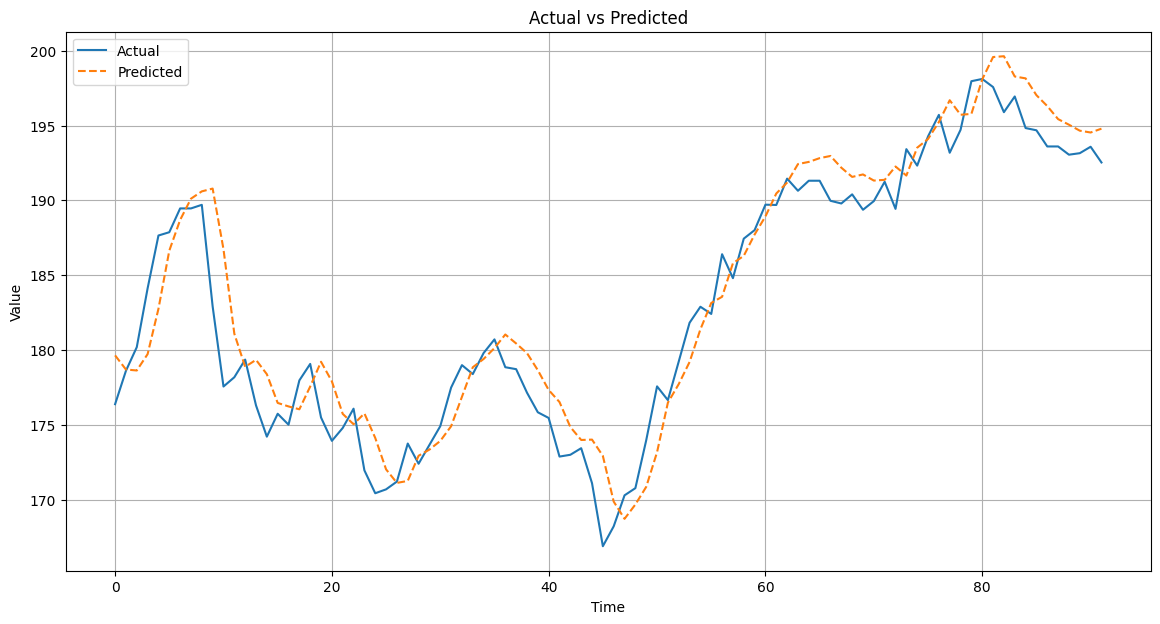

In [55]:
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

# Appropriate metrics for reporting

In [56]:


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")



Mean Absolute Error (MAE): 2.00
Mean Squared Error (MSE): 6.50
Root Mean Squared Error (RMSE): 2.55


# Comparison of the three models

## Linear regression Model: 
- MAE: 2.47 
- MSE: 9.72
- RMSE: 3.04 

## Exponential Smoothing Model: 
- MAE: 8.78
- MSE: 78.97
- RMSE: 8.89

## LSTM Model: 
- MAE: 2.00
- MSE: 6.50 
- RMSE: 2.55 

## Conclusion: 

- From these metrics, we can see that the LSTM model has the lowest MAE, MSE, and RMSE, indicating that it has the best performance among the three models on your specific dataset.

## In terms of real-world financial decision-making 

- Accuracy: The LSTM model's lower error rates suggest that it is more accurate in its predictions than the Linear Regression and Exponential Smoothing models. This could potentially lead to more profitable trading decisions.

- Risk Management: Despite the LSTM model's superior performance, it's important to remember that all models have the potential to make incorrect predictions. Therefore, risk management strategies should still be employed when making trading decisions based on the model's predictions.

- Model Complexity: While the LSTM model has the best performance, it is also the most complex of the three models. This could have implications for the computational resources required to train the model and the time it takes to make predictions. Depending on the specific requirements, a simpler model like Linear Regression might still be preferable despite its slightly worse performance.

- Model Interpretability: The Linear Regression model is the most interpretable of the three models, which could be an advantage in situations where it's important to understand the factors driving the model's predictions. The LSTM model, on the other hand, is a black-box model that might produce superior predictions but doesn't provide any insight into the relationships between the variables.

# Lastly, a comprehensive discussion on potential reasons for differences in performance

The LSTM (Long Short-Term Memory) model, Linear Regression model, and Exponential Smoothing model are fundamentally different in their approach to modeling data, which can lead to differences in their performance.

LSTM vs. Linear Regression and Exponential Smoothing

Ability to Capture Long-Term Dependencies: LSTM is a type of recurrent neural network that can capture long-term dependencies in a sequence due to its gating mechanisms. This makes it particularly suitable for time series forecasting, where past observations can influence future ones over varying time periods. In contrast, Linear Regression and Exponential Smoothing models typically consider a fixed number of previous observations (or none at all in the case of simple linear regression).

Non-linearity: LSTM models can capture complex non-linear relationships between inputs and outputs, which can lead to better performance if the underlying data has non-linear patterns. On the other hand, Linear Regression is a linear model and may not perform as well if the relationship between the variables is non-linear.

Overfitting: LSTM models, due to their complexity, are more prone to overfitting, especially when trained on small datasets. However, if properly regularized and validated, they can outperform simpler models on larger datasets or datasets where the underlying process is complex.

Linear Regression vs. Exponential Smoothing

Trend and Seasonality: Linear Regression can model trends by including time as a predictor variable, but it doesn't inherently model seasonality. On the other hand, certain types of Exponential Smoothing models (like Holt-Winters) can explicitly model both trend and seasonality, which can lead to better performance on time series data with these characteristics.

Model Assumptions: Linear Regression assumes a linear relationship between predictors and the target variable, and it requires the residuals to be normally distributed and homoscedastic. If these assumptions are violated, the model's performance can suffer. Exponential Smoothing doesn't make these assumptions, so it might perform better when these assumptions are not met.

Updating Predictions: Exponential Smoothing gives more weight to more recent observations when making predictions, which can be beneficial when the data has non-stationary or changing patterns. In contrast, Linear Regression treats all observations equally (unless explicitly modeled otherwise).

In conclusion, the choice of model and its performance largely depends on the characteristics of the data and the specific requirements of the task. It's often beneficial to try multiple models and choose the one that performs best on a validation set.